In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

housing = pd.read_csv(r'C:\Users\nateisgreat98\Downloads\Housing.csv') #pulling the data set

In [2]:
housing.head() #Testing to see I got the correct data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
def binary_map(x): #Conversion function for the binary values
    return x.map({'yes': 1, 'no': 0 })
def trinary_map(x): #Conversion function for furnished status
    return x.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [4]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist] = housing[varlist].apply(binary_map)
varlist = ['furnishingstatus']
housing[varlist] = housing[varlist].apply(trinary_map)

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [6]:
from sklearn.model_selection import train_test_split
import random
df_train, df_test = train_test_split(housing, train_size=0.7, test_size = 0.3, random_state = random.randint(0, 100000))
#Split the data into randomized test and training sets

In [7]:
def compute_cost(X, y, theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

In [8]:
def gradient_descent(X, y, theta, alpha, iterations, X2, y2):
    
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        cost_history2[i] = compute_cost(X2, y2, theta)
    
    return theta, cost_history, cost_history2

In [9]:
#Problem 1 part A ############################################################################################################

In [10]:
X = df_train.values[:,(1,2,3,4,10)]
m = len(df_train)
X_0 = np.ones((m,1))
X = np.hstack((X_0, X)) #Value for problem 1 linear regression

price = df_train.values[:,0]

X_f = df_test.values[:,(1,2,3,4,10)]
m_f = len(df_test)
X_0f = np.ones((m_f,1))
X_f = np.hstack((X_0f, X_f)) #testing values for problem 1 linear regression test

price_f = df_test.values[:,0]

In [11]:
#The most relevant parameter appears to be area.

In [12]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1500; #With such a small learning rate, increasing the iterations by an appricable amount causes the gradient
                    #descent to take a *very* long time. For now, 1500 will suffice.
alpha = 0.00000001; #An OBSCENELY small learning rate is required because we have no normilization or standardization

In [13]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [  6.15249667 853.04552078  23.43678028  13.18406741  20.01563242
   5.52598432]
Final Cost = 1883440924595.1667


Text(0.5, 1.0, 'Convergence of gradient descent')

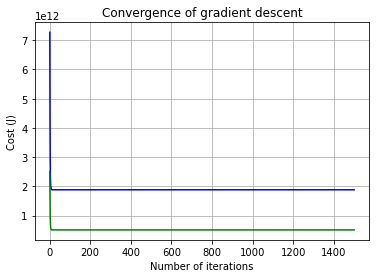

In [14]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [15]:
# Although this does converge it has a truly staggeringly high cost which is strangely lower for the verification set. This
# pattern of having a more accurate generalization will be seen in most of the future graphs as well. Overall, this is a truly 
# terrible system with a cost greater than a trillion!

In [16]:
#Problem 1 Part B ############################################################################################################

In [17]:
X = df_train.values[:,(1,2,3,4,5,6,7,8,9,10)]
X = np.hstack((X_0, X)) #Value for problem 1 part B linear regression

X_f = df_test.values[:,(1,2,3,4,5,6,7,8,9,10)]
X_f = np.hstack((X_0f, X_f)) #Testing values for problem 1 part B linear regression test

In [18]:
#The most relevant parameter again appears to be area.

In [19]:
theta = [0., 0., 0., 0., 0., 0.,0.,0.,0.,0.,0.]
iterations = 1500;
alpha = 0.00000001; #Again, this alpha is pure ridiculousness. 

In [20]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final cost =', cost_history)

Final value of theta = [  6.15248999 853.04410927  23.43675911  13.18405775  20.01561733
   5.32591327   2.4706565    4.38537155   0.87812667   5.27856018
   5.52598009]
Final cost = [7.27331719e+12 4.31154995e+12 2.97731357e+12 ... 1.88343563e+12
 1.88343557e+12 1.88343552e+12]


Text(0.5, 1.0, 'Convergence of gradient descent')

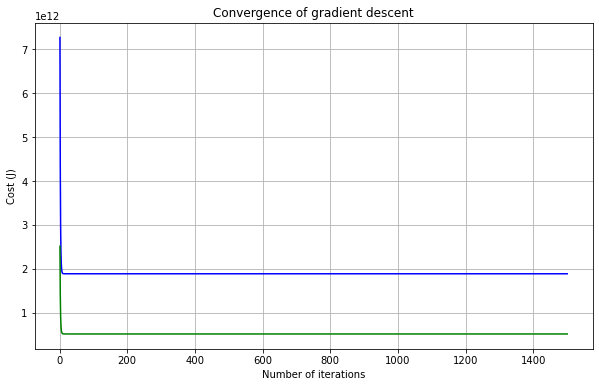

In [21]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [22]:
# My final cost is still far too high though it does converge slightly. 

In [23]:
#Number 2 part A ############################################################################################################

In [24]:
# First Normalization:

In [25]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
#define standard scaler for Normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [28]:
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
493,0.158763,0.4,0.000000,0.000000,0.000000,0.090909
221,0.121649,0.6,0.333333,0.333333,0.000000,0.261212
94,0.298969,0.6,0.333333,1.000000,0.333333,0.393939
193,0.216495,0.2,0.000000,0.000000,0.000000,0.284242
345,0.025086,0.4,0.000000,0.333333,0.000000,0.181818


In [29]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [30]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [31]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final cost =', cost_history[-1])

Final value of theta = [0.11390349 0.15690333 0.09782443 0.14167549 0.13398732 0.13548246]
Final cost = 0.007536059979386965


Text(0.5, 1.0, 'Convergence of gradient descent with Normalization')

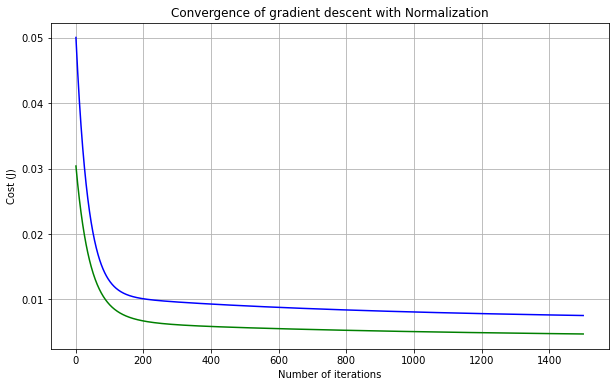

In [32]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Normalization')

In [33]:
#The cost and convergance are much MUCH better. The cost alone is literally less than 0.01 compared to over a trillion. Calling
#this a "night and day difference" feels inadequate.

In [34]:
#Now for standardization 

In [35]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [36]:
#define standard scaler for Standardization
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [37]:
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
493,-0.571059,0.028430,-0.578598,-0.908029,-0.825385,-1.073831
221,-0.807955,1.382391,1.355138,0.197271,-0.825385,-0.063039
94,0.323882,1.382391,1.355138,2.407872,0.309892,0.724731
193,-0.202553,-1.325532,-0.578598,-0.908029,-0.825385,0.073652
345,-1.424323,0.028430,-0.578598,0.197271,-0.825385,-0.534262


In [38]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [39]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [40]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [-9.67904672e-17  3.74500242e-01  6.83875544e-02  3.27237176e-01
  2.31618199e-01  1.94350695e-01]
Final Cost = 0.22070034024338397


Text(0.5, 1.0, 'Convergence of gradient descent with Standardization')

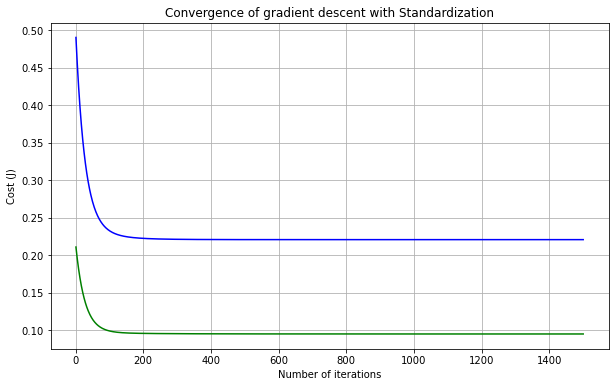

In [41]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Standardization')

In [42]:
# For standardization, once again the cost is far less than what it was originally. Intriguingly, it appears that the convergence 
# isn’t as close in the Standardization. In addition, the cost is slightly lower for both the training and testing data set with 
# Normalization. For these reasons I would choose *Normalization* as the input scaling that improves the model the most.

In [43]:
#Problem 2 part B #############################################################################################################

In [44]:
#Normalization

In [45]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

#define standard scaler for Normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [46]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [47]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [48]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [0.03935811 0.10736758 0.06820911 0.12516488 0.10619518 0.05837061
 0.03572974 0.03582247 0.04136425 0.0961572  0.09776022 0.05531797]
Final Cost = 0.00569225759572844


Text(0.5, 1.0, 'Convergence of gradient descent with Normalization')

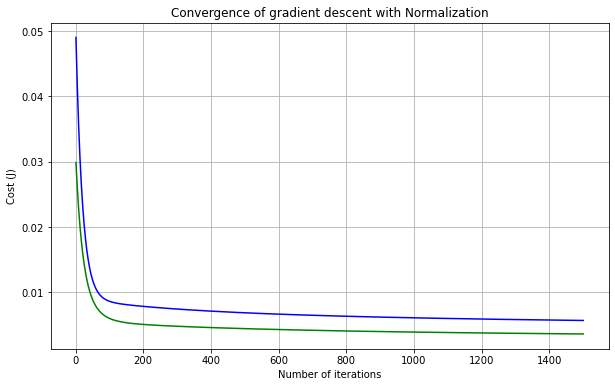

In [49]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Normalization')

In [50]:
# As before, the Normalization is looking very sharp. The model's cost continues to converge nicely, so no over fitting, and 
# possesses a very low final cost.

In [51]:
#Standardization

In [52]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

#define standard scaler for Standardization
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [53]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [54]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [55]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [-6.20020221e-17  2.84677146e-01  5.07305715e-02  3.01604089e-01
  1.98335190e-01  9.65620039e-02  4.83982465e-02  1.14061745e-01
  8.80656452e-02  2.12503049e-01  1.47950798e-01  1.23191302e-01]
Final Cost = 0.16765683919232421


Text(0.5, 1.0, 'Convergence of gradient descent with Standardization')

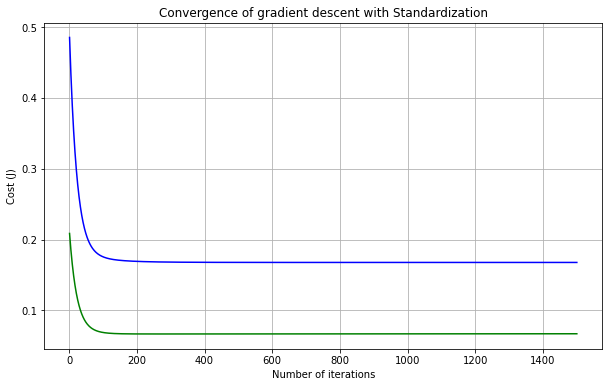

In [56]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Standardization')

In [57]:
# Again, as before the cost model continues to be roughly identical to what it was before. I believe the models remain mostly
# unchanged due to the binary options being underweighted. This idea shall be put to the test in problem 3.

In [58]:
# Number 3 Part A #############################################################################################################

In [59]:
def compute_cost(X, y, theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    
    penalty = 0.01
    penMod = theta
    penMod[0] = 0;
    penMod = np.square(penalty)
    penMod = np.sum(penMod, axis=0)
    
    J = 1 / (2 * m) * (np.sum(sqrErrors)+ penalty*penMod)
    
    return J
# New and improved compute_cost function to add in the penalty

In [60]:
# First Normalization ###################################################################################################

In [61]:
#define standard scaler for Normalization
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [62]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 3 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [63]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [64]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final cost =', cost_history[-1])

Final value of theta = [0.         0.24893578 0.25702713 0.14736832 0.16914607 0.17111154]
Final cost = 0.0071872833456280705


Text(0.5, 1.0, 'Convergence of gradient descent with Normalization & Penalty')

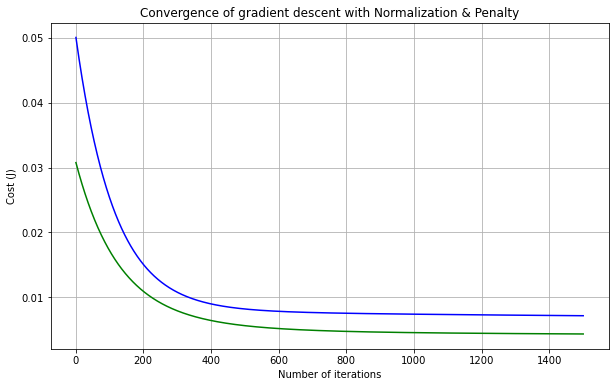

In [65]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Normalization & Penalty')

In [66]:
# Now for Standardization #########################################################################

In [67]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

#define standard scaler for Standardization
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [68]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [69]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [70]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [0.         0.37450024 0.06838755 0.32723718 0.2316182  0.19435069]
Final Cost = 0.2207003415557199


Text(0.5, 1.0, 'Convergence of gradient descent with Standardization & Penalty')

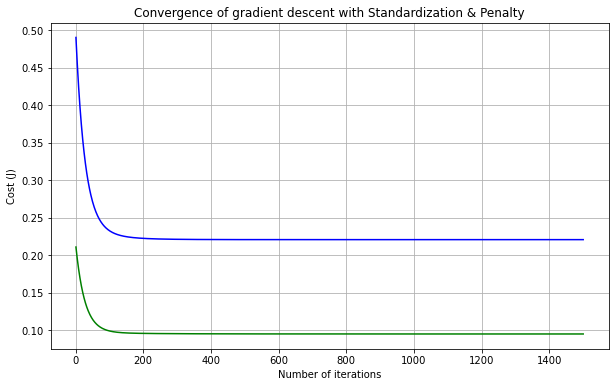

In [71]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Standardization & Penalty')

In [72]:
# The cost appears to be the same for both Standardization and Normalization. In fact it seems as though there is no difference 
# at all. It appear that for Normalization the difference between the test and training costs is slightly smaller. For the 
# Standardization, however, the two do not appear to differ at all. This, strikes me as odd and I fear I may have implemented 
# the penalty incorrectly. I will look into it more. remains near (if not equal to) the cost of the un-penalized model. I would 
# say that, for this data set, I would pick a normalization data set with penalization. I would still say that pealization is 
# probably not needed but the slightly better convergence pushes me to recommend it.

In [73]:
#Problem 3 Part B ##############################################################################################################

In [74]:
#Normalization

In [75]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

#define standard scaler for Normalization
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [76]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [77]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [78]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [0.         0.11841303 0.09980345 0.12501594 0.11025113 0.08379157
 0.03202289 0.04034767 0.04539317 0.09504758 0.0969751  0.05120782]
Final Cost = 0.005597593589310378


Text(0.5, 1.0, 'Convergence of gradient descent with Normalization')

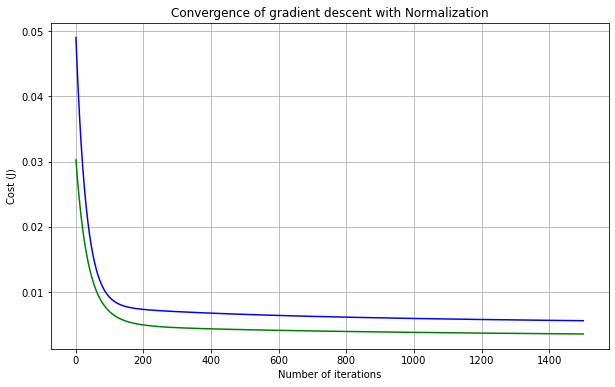

In [79]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Normalization')

In [80]:
#Standardization

In [81]:
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

#define standard scaler for Standardization
scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

In [82]:
price = df_Newtrain.pop('price')
X = np.hstack((X_0, df_Newtrain)) #Value for problem 2 part A linear regression
price_f = df_Newtest.pop('price')
X_f = np.hstack((X_0f, df_Newtest))

In [83]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500;
alpha = 0.01;

In [84]:
theta, cost_history, cost_history2 = gradient_descent(X, price, theta, alpha, iterations, X_f, price_f)
print('Final value of theta =', theta)
print('Final Cost =', cost_history[-1])

Final value of theta = [0.         0.28467715 0.05073057 0.30160409 0.19833519 0.096562
 0.04839825 0.11406174 0.08806565 0.21250305 0.1479508  0.1231913 ]
Final Cost = 0.16765684050466015


Text(0.5, 1.0, 'Convergence of gradient descent with Standardization')

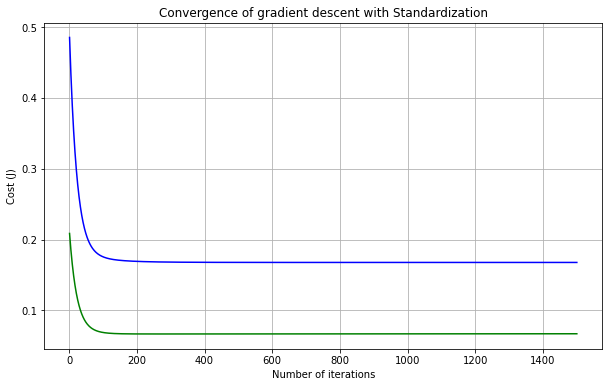

In [85]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='green')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent with Standardization')

In [ ]:
# Again, there doesn't appear to be that much of an impact from using the penalty. This again has me pushing for the 
# Standardization with the penalty due to how closely the test and training costs mirror each other.